In [32]:
# Required libraries
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.RegressionResults.html?highlight=regressionresults

In [33]:
housing = pd.read_csv('/Users/devi/Documents/Devi/MPS Analytics/Probability and Statistics/Module 5/housing-1.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
print(housing.shape)

(20640, 10)


In [35]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [36]:
x = housing['median_income']   # independent variable
y = housing['median_house_value']   # dependent variable

In [37]:
print(x.count()) 
print(y.count())

20640
20640


In [38]:
#Null Hypothesis - There is no linear relationship
#Alternate Hypothesis - There is a linear relationship

In [39]:
model = sm.OLS(y, x).fit()

In [40]:
print(model.summary())
model.params

                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          1.357e+05
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                        0.00
Time:                        17:49:51   Log-Likelihood:                     -2.6381e+05
No. Observations:               20640   AIC:                                  5.276e+05
Df Residuals:                   20639   BIC:                                  5.276e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

median_income    51180.604384
dtype: float64

Text(0.5, 1.0, 'Impact of Median Income on House Value in Housing data')

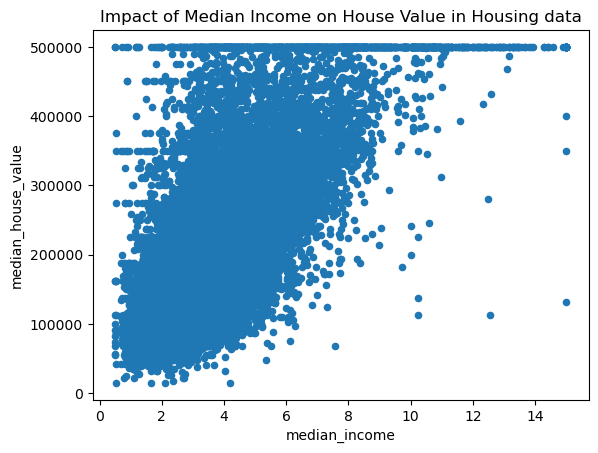

In [41]:
housing.plot.scatter("median_income", "median_house_value")
plt.title("Impact of Median Income on House Value in Housing data")

In [12]:
# Interpretation of housing dataset-
# Since the p_value (0.00) which is less than 0.05 (95%) confidence level in housing dataset, we can reject the null hypothesis. 
# Hence there is a linear relationship between median_income and median_house_value
# From the adjusted R^2 value, 86.8% of variation in median_house_value can be explanied by the linear relationship between median_house_value and median_income.

In [42]:
#Creation of Dummy variable on each Ocean Proximity categories

def categorize_variable(ocean_proximity):
    if ocean_proximity == 'NEAR BAY':
        return 1
    if ocean_proximity == '<1H OCEAN':
        return 2
    if ocean_proximity == 'INLAND':
        return 3
    if ocean_proximity == 'NEAR OCEAN':
        return 4
    else:
        return 5
housing["dummy_variable"] = housing["ocean_proximity"].apply(categorize_variable)
                                                             
#housing.head()
#housing.tail()

In [43]:
#Only Nearbay subset data is extracted from Dummy variable created

nearbay = housing.loc[housing['dummy_variable'] == 1]
nearbay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2290 entries, 0 to 19104
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2290 non-null   float64
 1   latitude            2290 non-null   float64
 2   housing_median_age  2290 non-null   float64
 3   total_rooms         2290 non-null   float64
 4   total_bedrooms      2270 non-null   float64
 5   population          2290 non-null   float64
 6   households          2290 non-null   float64
 7   median_income       2290 non-null   float64
 8   median_house_value  2290 non-null   float64
 9   ocean_proximity     2290 non-null   object 
 10  dummy_variable      2290 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 214.7+ KB


                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          1.504e+04
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                        0.00
Time:                        17:54:02   Log-Likelihood:                         -29709.
No. Observations:                2290   AIC:                                  5.942e+04
Df Residuals:                    2289   BIC:                                  5.943e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'Impact of Median Income on House Value - Near Bay')

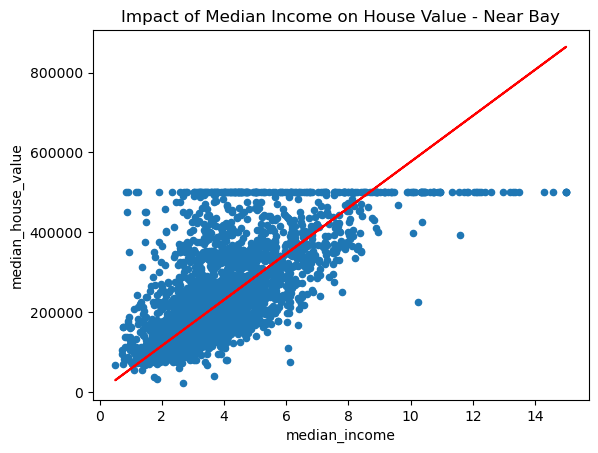

In [44]:
#Regression and scatter plot for 'Nearbay'
x = nearbay['median_income']   # independent variable
y = nearbay['median_house_value']   # dependent variable

modelnearbay = sm.OLS(y, x).fit()

print(modelnearbay.summary())

nearbay.plot.scatter("median_income", "median_house_value")

plt.plot(x, modelnearbay.params[0]*x, color='red')
plt.title("Impact of Median Income on House Value - Near Bay")

In [45]:
#Interpretation of Near Bay dataset-
#Out of 20640 values in housing dataset, there are 2290 houses near bay.
#Since the p_value (0.00) which is less than 0.05 (95%) confidence level near bay, we can reject the null hypothesis. 
# Hence there is a linear relationship between median_income and median_house_value near bay area. 
# From the adjusted R^2 value, 86.8% of variation in median_house_value can be explanied by the linear relationship between median_house_value and median_income.

In [17]:
#'<1H Ocean' subset data is extracted from Dummy variable created

hocean = housing.loc[housing['dummy_variable'] == 2]
hocean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9136 entries, 701 to 20506
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           9136 non-null   float64
 1   latitude            9136 non-null   float64
 2   housing_median_age  9136 non-null   float64
 3   total_rooms         9136 non-null   float64
 4   total_bedrooms      9034 non-null   float64
 5   population          9136 non-null   float64
 6   households          9136 non-null   float64
 7   median_income       9136 non-null   float64
 8   median_house_value  9136 non-null   float64
 9   ocean_proximity     9136 non-null   object 
 10  dummy_variable      9136 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 856.5+ KB


                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                          7.506e+04
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                        0.00
Time:                        17:09:47   Log-Likelihood:                     -1.1682e+05
No. Observations:                9136   AIC:                                  2.336e+05
Df Residuals:                    9135   BIC:                                  2.336e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'Impact of Median Income on House Value - <1H Ocean')

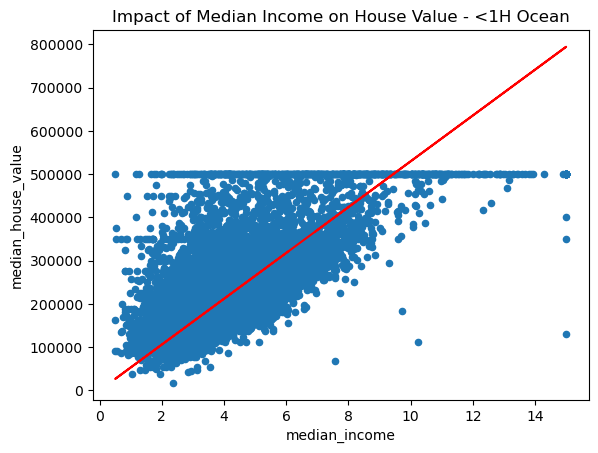

In [18]:
#Regression and scatter plot for '<1H Ocean'
x = hocean['median_income']   # independent variable
y = hocean['median_house_value']   # dependent variable

modelhocean = sm.OLS(y, x).fit()

print(modelhocean.summary())

hocean.plot.scatter("median_income", "median_house_value")

plt.plot(x, modelhocean.params[0]*x, color='red')
plt.title("Impact of Median Income on House Value - <1H Ocean")

In [19]:
#Interpretation of '<1 Hour Ocean' dataset-
#Out of 20640 values in housing dataset, there are 9034 houses less than 1 hour from ocean, 
#Since the p_value (0.00) which is less than 0.05 (95%) confidence level in less than 1 hour from ocean, we can reject the null hypothesis. 
#Hence there is a linear relationship between median_income and median_house_value less than 1 hour from ocean.
#From the adjusted R^2 value, 89.1% of variation in median_house_value can be explanied by the linear relationship between median_house_value and median_income.

In [20]:
# Only 'Inland' subset data is extracted from Dummy variable created

inland = housing.loc[housing['dummy_variable'] == 3]
inland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6551 entries, 954 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           6551 non-null   float64
 1   latitude            6551 non-null   float64
 2   housing_median_age  6551 non-null   float64
 3   total_rooms         6551 non-null   float64
 4   total_bedrooms      6496 non-null   float64
 5   population          6551 non-null   float64
 6   households          6551 non-null   float64
 7   median_income       6551 non-null   float64
 8   median_house_value  6551 non-null   float64
 9   ocean_proximity     6551 non-null   object 
 10  dummy_variable      6551 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 614.2+ KB


                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                          4.616e+04
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                        0.00
Time:                        17:09:49   Log-Likelihood:                         -80234.
No. Observations:                6551   AIC:                                  1.605e+05
Df Residuals:                    6550   BIC:                                  1.605e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'Impact of Median Income on House Value - Inland')

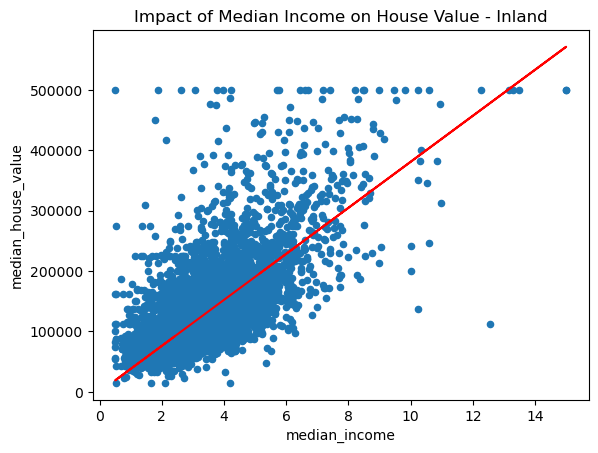

In [21]:
#Regression and scatter plot for 'Inland'
x = inland['median_income']   # independent variable
y = inland['median_house_value']   # dependent variable

modelinland = sm.OLS(y, x).fit()

print(modelinland.summary())

inland.plot.scatter("median_income", "median_house_value")

plt.plot(x, modelinland.params[0]*x, color='red')
plt.title("Impact of Median Income on House Value - Inland")

In [22]:
#Interpretation of 'Inland' dataset-
#Out of 20640 values in housing dataset, there are 6496 houses in inland. 
#Since the p_value (0.00) which is less than 0.05 (95%) confidence level in inland, we can reject the null hypothesis. 
#Hence there is a linear relationship between median_income and median_house_value inland.
#From the adjusted R^2 value, 87.6% of variation in median_house_value can be explanied by the linear relationship between median_house_value and median_income.

In [23]:
# Only 'Near Ocean' subset data is extracted from Dummy variable created

nearocean = housing.loc[housing['dummy_variable'] == 4]
nearocean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2658 entries, 1850 to 20425
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2658 non-null   float64
 1   latitude            2658 non-null   float64
 2   housing_median_age  2658 non-null   float64
 3   total_rooms         2658 non-null   float64
 4   total_bedrooms      2628 non-null   float64
 5   population          2658 non-null   float64
 6   households          2658 non-null   float64
 7   median_income       2658 non-null   float64
 8   median_house_value  2658 non-null   float64
 9   ocean_proximity     2658 non-null   object 
 10  dummy_variable      2658 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 249.2+ KB


                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                          2.070e+04
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                        0.00
Time:                        17:09:50   Log-Likelihood:                         -34200.
No. Observations:                2658   AIC:                                  6.840e+04
Df Residuals:                    2657   BIC:                                  6.841e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'Impact of Median Income on House Value - Near Ocean')

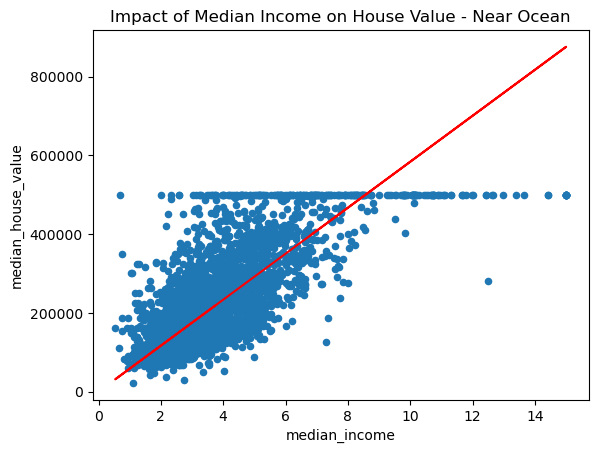

In [24]:
#Regression and scatter plot for 'Near Ocean'
x = nearocean['median_income']   # independent variable
y = nearocean['median_house_value']   # dependent variable

modelnearocean = sm.OLS(y, x).fit()

print(modelnearocean.summary())

nearocean.plot.scatter("median_income", "median_house_value")

plt.plot(x, modelnearocean.params[0]*x, color='red')
plt.title("Impact of Median Income on House Value - Near Ocean")

In [25]:
#Interpretation of 'Near Ocean' dataset-
#Out of 20640 values in housing dataset, there are 2628 houses near ocean. 
#Since the p_value (0.00) which is less than 0.05 (95%) confidence level in inland, we can reject the null hypothesis. 
#Hence there is a linear relationship between median_income and median_house_value near ocean.
#From the adjusted R^2 value, 88.6% of variation in median_house_value can be explanied by the linear relationship between median_house_value and median_income.

In [26]:
# Only 'Island' subset data is extracted from Dummy variable created
island = housing.loc[housing['dummy_variable'] == 5]
island.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 8314 to 8318
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           5 non-null      float64
 1   latitude            5 non-null      float64
 2   housing_median_age  5 non-null      float64
 3   total_rooms         5 non-null      float64
 4   total_bedrooms      5 non-null      float64
 5   population          5 non-null      float64
 6   households          5 non-null      float64
 7   median_income       5 non-null      float64
 8   median_house_value  5 non-null      float64
 9   ocean_proximity     5 non-null      object 
 10  dummy_variable      5 non-null      int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 480.0+ bytes


                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                              44.64
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                     0.00261
Time:                        17:09:51   Log-Likelihood:                         -65.183
No. Observations:                   5   AIC:                                      132.4
Df Residuals:                       4   BIC:                                      132.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

/Users/devi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Text(0.5, 1.0, 'Impact of Median Income on House Value - Island')

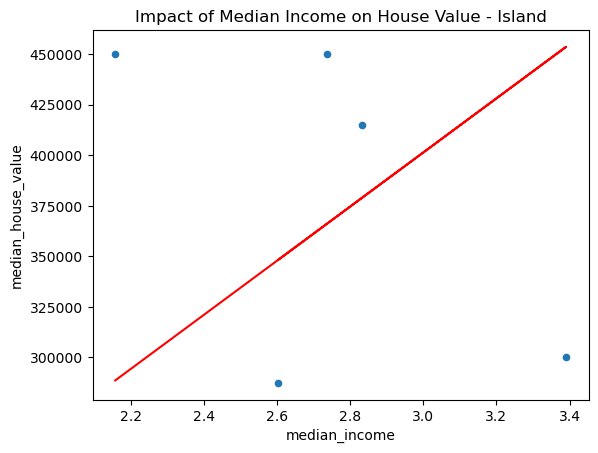

In [27]:
#Regression and scatter plot for 'Island'
x = island['median_income']   # independent variable
y = island['median_house_value']   # dependent variable

modelisland = sm.OLS(y, x).fit()

print(modelisland.summary())

island.plot.scatter("median_income", "median_house_value")
plt.plot(x, modelisland.params[0]*x, color='red')

plt.title("Impact of Median Income on House Value - Island")

In [28]:
#Interpretation of 'Island' dataset-
#Out of 20640 values in housing dataset, there are only 5 houses in island, 
#Since the p_value (0.003) which is less than 0.05 (95%) confidence level in inland, we can reject the null hypothesis. 
#Hence there is a linear relationship between median_income and median_house_value in island.
#From the adjusted R^2 value, 88.7% of variation in median_house_value can be explanied by the linear relationship between median_house_value and median_income.

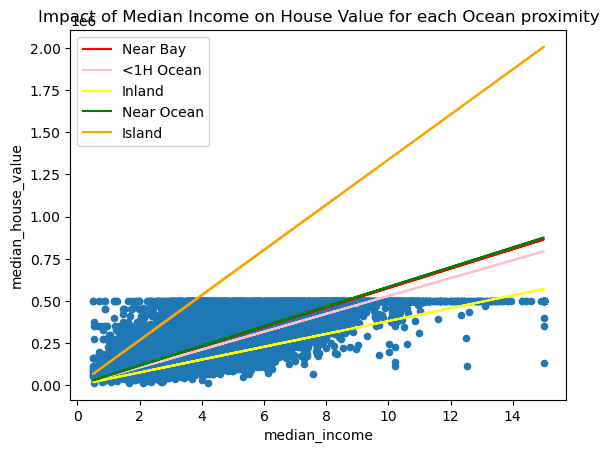

In [46]:
#Multple regression in samme plot

from matplotlib.lines import Line2D

housing.plot.scatter("median_income", "median_house_value")
x = housing["median_income"]
y = housing["median_house_value"]
plt.plot(x, modelnearbay.params[0]*x, color='red')
plt.plot(x, modelhocean.params[0]*x, color='pink')
plt.plot(x, modelinland.params[0]*x, color='yellow')
plt.plot(x, modelnearocean.params[0]*x, color='green')
plt.plot(x, modelisland.params[0]*x, color='orange')

plt.title("Impact of Median Income on House Value for each Ocean proximity")

handles, labels = plt.gca().get_legend_handles_labels()
line1 = Line2D([0], [0], label='Near Bay', color='red')
line2 = Line2D([0], [0], label='<1H Ocean', color='pink')
line3 = Line2D([0], [0], label='Inland', color='yellow')
line4 = Line2D([0], [0], label='Near Ocean', color='green')
line5 = Line2D([0], [0], label='Island', color='orange')

handles.extend([line1, line2, line3, line4, line5])
plt.legend(handles=handles)

In [30]:
#Actual value and the predicted value

actualvspredictvalue = pd.DataFrame({
    'Median income': x,
    'Actual value': y, 
    'Near bay': modelnearbay.params[0]*x, 
    '<1H Ocean': modelhocean.params[0]*x,
    'Inland': modelinland.params[0]*x,
    'Near ocean': modelnearocean.params[0]*x,
    'Island': modelisland.params[0]*x
})

actualvspredictvalue.head()

,Median income,Actual value,Near bay,<1H Ocean,Inland,Near ocean,Island
0,8.3252,452600.0,479985.772141,440875.455859,317058.367376,485914.341516,1.113644e+06
1,8.3014,358500.0,478613.593530,439615.085435,316151.964029,484525.214369,1.110460e+06
2,7.2574,352100.0,418422.229224,384328.248372,276392.086124,423590.393278,9.708065e+05
3,5.6431,341300.0,325350.467348,298840.182212,214912.803649,329369.050667,7.548651e+05
4,3.8462,342200.0,221750.982176,203682.215241,146479.350959,224489.951033,5.144978e+05


In [31]:
#Interpretation: 

#The median house value based on median income and ocean proximity was analyzed. 
#Dummy variables were created for each of the 5 variables in Ocean proximity, i.e., nearbay, less than 1 hour ocean, inland, near ocean, and island.
#In the multiple regression scatter plot, there are 5 regression lines indicating each of the ocean proximity. 

#Through the multiple regression, with respect to median income, it is evident that the house value differs for each ocean proximity. 
#The houses are lower in price in inland followed by houses which are less than 1 hour from ocean, near bay, and near ocean in increasing order of price.
#The house value is highest in islands. 
#Overall, based on median income, there is a steady increase in house value in all categories yet the highest house value irrespective of median incomme is Rs.500,000.

#While looking at each of the individual scatterplot and regression line, it helps to understand the number of houses present in each category of ocean proximity. 
#More number of houses was observed in less than 1 hour of the ocean (9136) followed with inland (6551), near ocean (2658), and near bay (2290). 
#The least number of houses was observed in island (5). 
#Even though the hypothesis testing for Island subset indicates a linear relationship between medium income and house value yet since the number of houses are less, it is not visually shown in scatter plot. 
#Also, through the individual scatterplot, the coefficient in each is helpful to determine the slope and angle of the regression line

## Observations based on ocean proximity
# Properties inland are in general lower in price compared to properties closer to the ocean. 
# Hence the change in median_house_value for inland properties has lesser increase (has least slope) compared to other subsets for any fixed increase of median_income. 
